In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.skbn as skbn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/iris.csv")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['sepal_length'] = pd.qcut(data['sepal_length'], 4, labels=False)
data['sepal_width'] = pd.qcut(data['sepal_width'], 4, labels=False)
data['petal_length'] = pd.qcut(data['petal_length'], 4, labels=False)
data['petal_width'] = pd.qcut(data['petal_width'], 4, labels=False)

In [5]:
data['species'] = data['species'].replace(['Iris-versicolor', 'Iris-virginica'], 'Iris-versicolor-virginica')

In [6]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
79,1,0,1,1,Iris-versicolor-virginica
4,0,3,0,0,Iris-setosa
55,1,0,2,1,Iris-versicolor-virginica
142,1,0,2,3,Iris-versicolor-virginica
0,0,3,0,0,Iris-setosa


In [7]:
TAN = skbn.BNClassifier(learningMethod="TAN", prior='Smoothing', priorWeight = 0.5,
                          discretizationStrategy = 'quantile', usePR = True, significant_digit = 13)

In [8]:
type(TAN)

pyAgrum.skbn.bnclassifier.BNClassifier

In [9]:
TAN

BNClassifier(learningMethod='TAN', prior='Smoothing', priorWeight=0.5,
             significant_digit=13, usePR=True)

In [10]:
X = data.drop('species', axis=1)
y = data['species']

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,0,3,0,0
1,0,1,0,0
2,0,2,0,0
3,0,2,0,0
4,0,3,0,0
...,...,...,...,...
145,3,1,3,3
146,2,0,2,3
147,3,1,3,3
148,2,3,3,3


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [13]:
TAN.fit(X_train, y_train)

In [14]:
TAN.score(X_test, y_test)

0.9733333333333334

In [15]:
gnb.sideBySide(TAN.bn, gnb.getInference(TAN.bn, size='5!'))

In [16]:
TAN.bn['petal_length']

(pyAgrum.DiscreteVariable@000001EF52C807B0) petal_length:Range([0,3])

In [17]:
TAN.bn.cpt(TAN.bn.idFromName('petal_length'))

(pyAgrum.Potential<double>@000001EF5290C0F0) 
      ||  petal_length                         |
specie||0        |1        |2        |3        |
------||---------|---------|---------|---------|
Iris-s|| 0.8478  | 0.1087  | 0.0217  | 0.0217  |
Iris-v|| 0.0089  | 0.2589  | 0.3482  | 0.3839  |

In [18]:
print(TAN.bn.cpt(TAN.bn.idFromName('petal_length'))[0])
print(TAN.bn.cpt(TAN.bn.idFromName('petal_length'))[1])

[0.84782609 0.10869565 0.02173913 0.02173913]
[0.00892857 0.25892857 0.34821429 0.38392857]


In [19]:
gnb.showPotential(TAN.bn.cpt(TAN.bn.idFromName('petal_length')),digits=2)

In [20]:
gnb.showPotential(TAN.bn.cpt(TAN.bn.idFromName('sepal_length')),digits=2)

In [21]:
gnb.showPotential(TAN.bn.cpt(TAN.bn.idFromName('sepal_width')),digits=2)

In [22]:
gnb.showPotential(TAN.bn.cpt(TAN.bn.idFromName('petal_width')),digits=2)

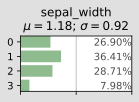

In [23]:
gnb.showPosterior(TAN.bn, {'petal_width':3}, 'sepal_width')

In [24]:
gum.getPosterior(TAN.bn, evs={'petal_width':3}, target='sepal_width')

(pyAgrum.Potential<double>@000001EF64552D80) 
  sepal_width                          |
0        |1        |2        |3        |
---------|---------|---------|---------|
 0.2690  | 0.3641  | 0.2871  | 0.0798  |

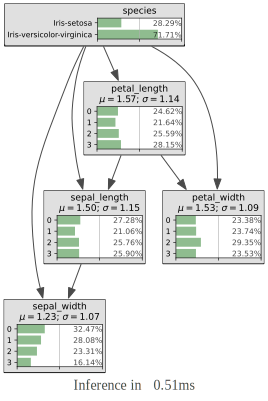

In [25]:
gnb.showInference(TAN.bn, size="10")

In [26]:
ie=gum.LazyPropagation(TAN.bn)
ie.evidenceImpact('species', ['petal_width', 'sepal_width'])

(pyAgrum.Potential<double>@000001EF64ACF010) 
             ||  species          |
petal_|sepal_||Iris-seto|Iris-vers|
------|------||---------|---------|
0     |0     || 0.6937  | 0.3063  |
1     |0     || 0.0372  | 0.9628  |
2     |0     || 0.0131  | 0.9869  |
3     |0     || 0.0235  | 0.9765  |
0     |1     || 0.8902  | 0.1098  |
1     |1     || 0.1639  | 0.8361  |
[...4 more line(s) ...]
2     |2     || 0.0481  | 0.9519  |
3     |2     || 0.0454  | 0.9546  |
0     |3     || 0.9855  | 0.0145  |
1     |3     || 0.5960  | 0.4040  |
2     |3     || 0.2282  | 0.7718  |
3     |3     || 0.3003  | 0.6997  |

In [27]:
ie.evidenceImpact('petal_length', ['petal_width', 'species'])

(pyAgrum.Potential<double>@000001EF64ACEE30) 
             ||  petal_length                         |
petal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.9319  | 0.0538  | 0.0072  | 0.0072  |
1     |Iris-s|| 0.6616  | 0.2672  | 0.0356  | 0.0356  |
2     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
3     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
0     |Iris-v|| 0.0828  | 0.3001  | 0.3075  | 0.3096  |
1     |Iris-v|| 0.0082  | 0.7467  | 0.2142  | 0.0308  |
2     |Iris-v|| 0.0057  | 0.1033  | 0.6139  | 0.2771  |
3     |Iris-v|| 0.0072  | 0.0261  | 0.1335  | 0.8333  |

These are the parameters we need to calculate the ratios for the interpretability.

In a tree-augmented naive Bayes (TAN) model the joint likelihood of the features is decomposed as

$$P(x_1, \dots, x_n \mid c) = \prod_{i=1}^{n} P(x_i \mid c, x_{\pi(i)}),$$

where $x_{\pi(i)}$ denotes the parent of $x_i$ in the tree (with the convention that the root node has no parent). Adapting the original discriminant function, we replace each term $P(x_i \mid c)$ by $P(x_i \mid c, x_{\pi(i)})$. This gives

$$d(\mathbf{x}) = \ln \frac{P(c \mid \mathbf{x})}{P(c' \mid \mathbf{x})} = \ln \frac{P(c)}{P(c')} + \sum_{i=1}^{n} \ln \frac{P(x_i \mid c, x_{\pi(i)})}{P(x_i \mid c', x_{\pi(i)})}.$$

This is the adapted discriminant function for a TAN model.


In [28]:
TAN.bn

(pyAgrum.BayesNet<double>@000001EF529A8F40) BN{nodes: 5, arcs: 7, domainSize: 512, dim: 79, mem: 848o}

In [29]:
TAN.bn.descendants(3)

{1, 2, 4}

In [30]:
TAN.bn.ids(["species", "sepal_length", "sepal_width", "petal_length", "petal_width"])

[0, 1, 2, 3, 4]

In [31]:
ie.evidenceImpact('petal_length', ['petal_width', 'species'])

(pyAgrum.Potential<double>@000001EF64ACEB30) 
             ||  petal_length                         |
petal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.9319  | 0.0538  | 0.0072  | 0.0072  |
1     |Iris-s|| 0.6616  | 0.2672  | 0.0356  | 0.0356  |
2     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
3     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
0     |Iris-v|| 0.0828  | 0.3001  | 0.3075  | 0.3096  |
1     |Iris-v|| 0.0082  | 0.7467  | 0.2142  | 0.0308  |
2     |Iris-v|| 0.0057  | 0.1033  | 0.6139  | 0.2771  |
3     |Iris-v|| 0.0072  | 0.0261  | 0.1335  | 0.8333  |

The same with ids:

In [32]:
ie.evidenceImpact(3, [4, 0])

(pyAgrum.Potential<double>@000001EF64ACEF30) 
             ||  petal_length                         |
petal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.9319  | 0.0538  | 0.0072  | 0.0072  |
1     |Iris-s|| 0.6616  | 0.2672  | 0.0356  | 0.0356  |
2     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
3     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
0     |Iris-v|| 0.0828  | 0.3001  | 0.3075  | 0.3096  |
1     |Iris-v|| 0.0082  | 0.7467  | 0.2142  | 0.0308  |
2     |Iris-v|| 0.0057  | 0.1033  | 0.6139  | 0.2771  |
3     |Iris-v|| 0.0072  | 0.0261  | 0.1335  | 0.8333  |

Por ejemplo:

$$\frac{P(petallength \mid species, petalwidth)}{P(petallength \mid species', petalwidth)}.$$

In [33]:
ie.evidenceImpact(3, [4, 0])[0, 3, :]

array([0.45217391, 0.30434783, 0.12173913, 0.12173913])

In [34]:
import seaborn as sns

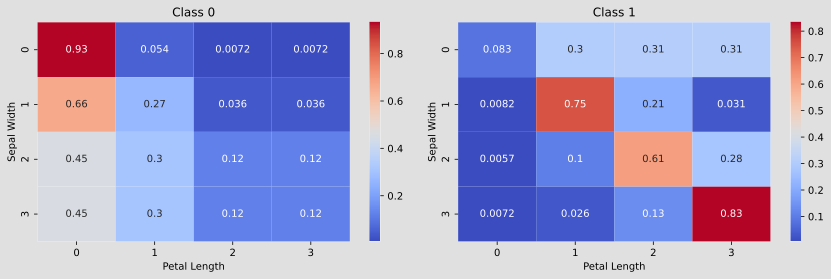

In [35]:
combination_class0 = ie.evidenceImpact(3, [4, 0])[0, :, :]
combination_class1 = ie.evidenceImpact(3, [4, 0])[1, :, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(combination_class0, annot=True, cmap='coolwarm', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'], ax=axes[0])
axes[0].set_xlabel('Petal Length')
axes[0].set_ylabel('Sepal Width')
axes[0].set_title('Class 0')

sns.heatmap(combination_class1, annot=True, cmap='coolwarm', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'], ax=axes[1])
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Sepal Width')
axes[1].set_title('Class 1')

plt.tight_layout()
plt.show()

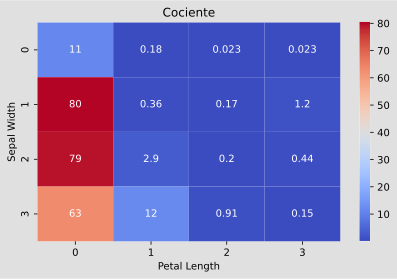

In [36]:
cociente = combination_class0 / combination_class1

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(cociente, annot=True, cmap='coolwarm', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'], ax=ax)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Cociente')

plt.tight_layout()
plt.show()

In [37]:
TAN.bn

(pyAgrum.BayesNet<double>@000001EF529A8F40) BN{nodes: 5, arcs: 7, domainSize: 512, dim: 79, mem: 848o}

In [38]:
print(dir(TAN.bn))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__weakref__', '_repr_html_', 'add', 'addAMPLITUDE', 'addAND', 'addArc', 'addArcs', 'addCOUNT', 'addEXISTS', 'addFORALL', 'addLogit', 'addMAX', 'addMEDIAN', 'addMIN', 'addNoisyAND', 'addNoisyOR', 'addNoisyORCompound', 'addNoisyORNet', 'addOR', 'addSUM', 'addStructureListener', 'addVariables', 'addWeightedArc', 'adjacencyMatrix', 'ancestors', 'arcs', 'beginTopologyTransformation', 'changePotential', 'changeVariableLabel', 'changeVariableName', 'check', 'children', 'clear', 'completeInstantiation', 'connectedComponents', 'cpt', 'dag', 'descendants', 'dim', 'empty', 'endTopologyTransform

In [39]:
TAN.bn.ancestors(4)

{0, 3}

### Sample example

In [40]:
ie=gum.LazyPropagation(TAN.bn)

In [41]:
X_test.iloc[[0]]

,sepal_length,sepal_width,petal_length,petal_width
73,2,0,2,1


In [42]:
for name, value in X_test.iloc[[0]].items():
    parents = TAN.bn.ancestors(name)
    var_value = value.values[0]
    print(f'{name} -> {var_value} | parents -> {parents}')

sepal_length -> 2 | parents -> {0, 3}
sepal_width -> 0 | parents -> {0, 1, 3}
petal_length -> 2 | parents -> {0}
petal_width -> 1 | parents -> {0, 3}


In [43]:
TAN.bn

(pyAgrum.BayesNet<double>@000001EF529A8F40) BN{nodes: 5, arcs: 7, domainSize: 512, dim: 79, mem: 848o}

In [44]:
for x in TAN.bn.ancestors("sepal_length"):
    print(TAN.bn.variable(x).name())

species
petal_length


In [45]:
ie.evidenceImpact('petal_width', {'species', 'petal_length'})

(pyAgrum.Potential<double>@000001EF64559F00) 
             ||  petal_width                          |
petal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.8333  | 0.1190  | 0.0238  | 0.0238  |
1     |Iris-s|| 0.3750  | 0.3750  | 0.1250  | 0.1250  |
2     |Iris-s|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
3     |Iris-s|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
0     |Iris-v|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
1     |Iris-v|| 0.0312  | 0.7812  | 0.1562  | 0.0312  |
2     |Iris-v|| 0.0238  | 0.1667  | 0.6905  | 0.1190  |
3     |Iris-v|| 0.0217  | 0.0217  | 0.2826  | 0.6739  |

In [46]:
ie.evidenceImpact('petal_length', {'species', 'sepal_length'})

(pyAgrum.Potential<double>@000001EF64559D60) 
             ||  petal_length                         |
sepal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.9665  | 0.0186  | 0.0074  | 0.0074  |
1     |Iris-s|| 0.5616  | 0.3780  | 0.0302  | 0.0302  |
2     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
3     |Iris-s|| 0.4522  | 0.3043  | 0.1217  | 0.1217  |
0     |Iris-v|| 0.0242  | 0.6150  | 0.2701  | 0.0906  |
1     |Iris-v|| 0.0100  | 0.6175  | 0.3350  | 0.0375  |
2     |Iris-v|| 0.0065  | 0.1658  | 0.4612  | 0.3665  |
3     |Iris-v|| 0.0065  | 0.0236  | 0.2654  | 0.7045  |

In [58]:
print(dir(TAN.bn))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__weakref__', '_repr_html_', 'add', 'addAMPLITUDE', 'addAND', 'addArc', 'addArcs', 'addCOUNT', 'addEXISTS', 'addFORALL', 'addLogit', 'addMAX', 'addMEDIAN', 'addMIN', 'addNoisyAND', 'addNoisyOR', 'addNoisyORCompound', 'addNoisyORNet', 'addOR', 'addSUM', 'addStructureListener', 'addVariables', 'addWeightedArc', 'adjacencyMatrix', 'ancestors', 'arcs', 'beginTopologyTransformation', 'changePotential', 'changeVariableLabel', 'changeVariableName', 'check', 'children', 'clear', 'completeInstantiation', 'connectedComponents', 'cpt', 'dag', 'descendants', 'dim', 'empty', 'endTopologyTransform

In [63]:
TAN.bn

(pyAgrum.BayesNet<double>@000001EF529A8F40) BN{nodes: 5, arcs: 7, domainSize: 512, dim: 79, mem: 848o}

In [62]:
TAN.bn.cpt(TAN.bn.idFromName('petal_width'))

(pyAgrum.Potential<double>@000001EF5290C610) 
             ||  petal_width                          |
petal_|specie||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |Iris-s|| 0.8333  | 0.1190  | 0.0238  | 0.0238  |
1     |Iris-s|| 0.3750  | 0.3750  | 0.1250  | 0.1250  |
2     |Iris-s|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
3     |Iris-s|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
0     |Iris-v|| 0.2500  | 0.2500  | 0.2500  | 0.2500  |
1     |Iris-v|| 0.0312  | 0.7812  | 0.1562  | 0.0312  |
2     |Iris-v|| 0.0238  | 0.1667  | 0.6905  | 0.1190  |
3     |Iris-v|| 0.0217  | 0.0217  | 0.2826  | 0.6739  |

PROBLEM: `sepal_length`, for example, only depends on `petal_length` (its parent) and `species`!!!

#### MANUAL CALCULATION

In [47]:
joint_train = pd.concat([X_train, y_train], axis=1)
joint_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
84,1,1,2,2,Iris-versicolor-virginica
148,2,3,3,3,Iris-versicolor-virginica
53,1,0,1,1,Iris-versicolor-virginica


In [48]:
temp = joint_train[(joint_train['species'] == 'Iris-versicolor-virginica') & (joint_train['petal_length'] == 1)]
temp[temp['sepal_length'] == 0].shape[0] / temp.shape[0]

0.21428571428571427

In [49]:
# generate manual cpt
cpt = np.zeros((4, 4, 2))
for i in range(4):
    for j in range(4):
        temp = joint_train[(joint_train['species'] == 'Iris-versicolor-virginica') & (joint_train['petal_length'] == i)]
        try:
            cpt[i, j, 0] = temp[temp['sepal_length'] == j].shape[0] / temp.shape[0]
        except ZeroDivisionError:
            cpt[i, j, 0] = 0
        cpt[i, j, 1] = 1 - cpt[i, j, 0]

cpt

array([[[0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ],
        [0.        , 1.        ]],

       [[0.21428571, 0.78571429],
        [0.57142857, 0.42857143],
        [0.21428571, 0.78571429],
        [0.        , 1.        ]],

       [[0.05263158, 0.94736842],
        [0.21052632, 0.78947368],
        [0.47368421, 0.52631579],
        [0.26315789, 0.73684211]],

       [[0.        , 1.        ],
        [0.        , 1.        ],
        [0.33333333, 0.66666667],
        [0.66666667, 0.33333333]]])

In [50]:
import numpy as np
import pandas as pd

species_values = ["Iris-setosa", "Iris-versicolor-virginica"]
petal_length_values = range(4)
sepal_length_values = range(4)

data = []

for species in species_values:
    for petal_length in petal_length_values:
        temp = joint_train[(joint_train['species'] == species) & (joint_train['petal_length'] == petal_length)]
        total = temp.shape[0]  # Cantidad total de muestras para esta combinación

        for sepal_length in sepal_length_values:
            count = temp[temp['sepal_length'] == sepal_length].shape[0]  # Casos donde sepal_length == j
            prob = count / total if total > 0 else 0  # Evitar división por 0
            
            # Agregar la fila a la lista
            data.append([species, petal_length, sepal_length, prob])

df_cpt = pd.DataFrame(data, columns=["Species", "Petal Length", "Sepal Length", "P(Sepal Length | Petal Length, Species)"])

In [51]:
df_cpt_pivot = df_cpt.pivot_table(
    index=["Species", "Petal Length"], 
    columns="Sepal Length", 
    values="P(Sepal Length | Petal Length, Species)", 
    aggfunc="first"
)

df_cpt_pivot

Sepal Length                                   0         1         2         3
Species                   Petal Length                                        
Iris-setosa               0             0.894737  0.105263  0.000000  0.000000
                          1             0.000000  1.000000  0.000000  0.000000
                          2             0.000000  0.000000  0.000000  0.000000
                          3             0.000000  0.000000  0.000000  0.000000
Iris-versicolor-virginica 0             0.000000  0.000000  0.000000  0.000000
                          1             0.214286  0.571429  0.214286  0.000000
                          2             0.052632  0.210526  0.473684  0.263158
                          3             0.000000  0.000000  0.333333  0.666667

In [52]:
temp = joint_train[(joint_train['species'] == 'Iris-setosa') & (joint_train['petal_length'] == 0)]
temp['sepal_length'].value_counts()

sepal_length
0    17
1     2
Name: count, dtype: int64

In [53]:
temp = joint_train[(joint_train['species'] == 'Iris-versicolor-virginica') & (joint_train['petal_length'] == 0)]
temp['sepal_length'].value_counts()

Series([], Name: count, dtype: int64)